<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    VGG Net Image Classification
</div>



In [27]:
import os
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import UnidentifiedImageError
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [12]:
model = VGG16()

In [28]:
def preedict_image(url):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200 and 'image' in response.headers['Content-Type']:
            with open("download_image.jpg", "wb") as f:
                f.write(response.content)
        else:
            print("Invalid image URL or content type.")
            return


        img = load_img("download_image.jpg", target_size=(224, 224))
        plt.imshow(img)
        plt.axis('off')
        plt.show()


        img = img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)


        y_pred = model.predict(img)
        predictions = decode_predictions(y_pred, top=5)[0]


        for _, label, prob in predictions:
            print(f"{label}: {prob:.2f}")

    except UnidentifiedImageError:
        print("Failed to identify the image. Please check the URL.")

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if os.path.exists("download_image.jpg"):
            os.remove("download_image.jpg")


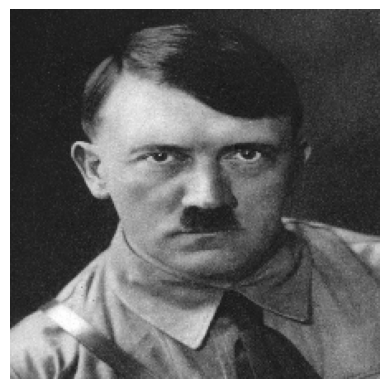

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
military_uniform: 0.19
trench_coat: 0.05
suit: 0.05
Windsor_tie: 0.04
banjo: 0.03


In [32]:
hitler = f'https://cdn.britannica.com/58/129958-050-C0EF01A4/Adolf-Hitler-1933.jpg'

preedict_image(hitler)